<a href="https://colab.research.google.com/github/ahimsaj/ML-Training/blob/main/Covid_tweets_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('/content/Corona_NLP_train.csv', encoding = 'latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
import re
import string 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('punkt')

stop_words = stopwords.words('english')

def clean_text(text) :
    
    text = re.sub(r"#\w+", " ", text) #remove hashtag
    text = re.sub(r"@\w+", " ", text) #remove mentions
    text = re.sub(r"http\S+", " ", text) #remove URLs
    text = re.sub(r"[0-9]", " ", text) #remove non-words
    text = text.lower().strip()
    
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    text = " ".join(word_tokenize(text))
    
    return text



df['clean_tweet'] = df['OriginalTweet'].apply(clean_text)
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia : woolworths give elderl...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,"food stock one empty ... please , panic , enou..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me , ready go supermarket outbreak . i 'm para..."


In [9]:
df['Sentiment'].value_counts() #Count the Sentiment

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [10]:
#Changing Sentiment into Unique Code
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sentiment'] = df['Sentiment'].replace('Extremely Positive', 'Positive')
df['Sentiment'] = df['Sentiment'].replace('Extremely Negative', 'Negative')

df['sentiment_id'] = le.fit_transform(df['Sentiment'])

df['sentiment_id'].value_counts()

2    18046
0    15398
1     7713
Name: sentiment_id, dtype: int64

In [11]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet,sentiment_id
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,2
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia : woolworths give elderl...,2
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,"food stock one empty ... please , panic , enou...",2
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,"me , ready go supermarket outbreak . i 'm para...",0


In [12]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

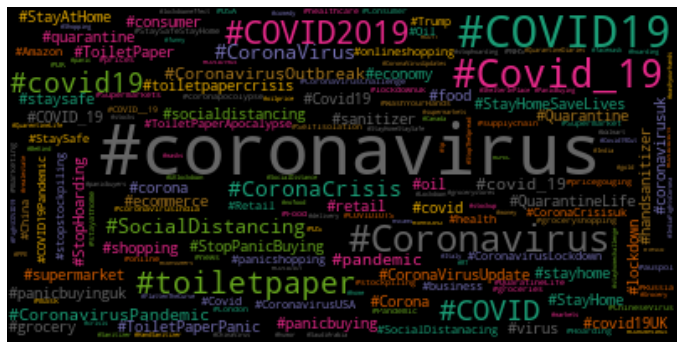

In [13]:
import matplotlib.pyplot as plt

def create_wordcloud(pattern) :
    
    data = df['OriginalTweet'].str.extractall(pattern)[0].value_counts()
    
    data.index = data.index.map(str)
    
    data_wc = WordCloud(max_words = 500, colormap = 'Dark2_r',
                       background_color = 'black').generate_from_frequencies(data)
    
    fig = plt.figure()
    fig.set_figwidth(12)
    fig.set_figheight(12)
    
    plt.imshow(data_wc,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    
hashtag = r'(#\w+)'

create_wordcloud(hashtag)

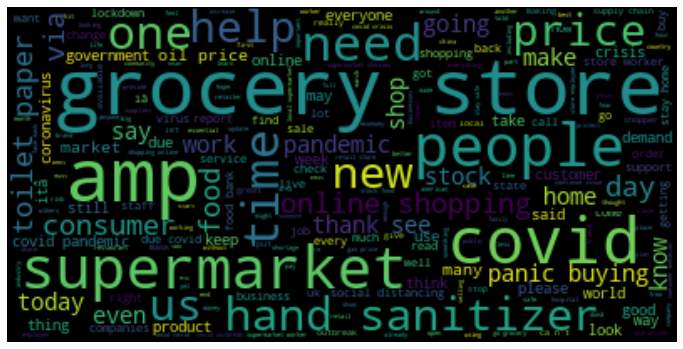

In [14]:
word = ",".join([word for word in df['clean_tweet']])
stopwords = set(STOPWORDS)

tweet_wc = WordCloud(max_words = 500, stopwords = stopwords).generate(word)

fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)

plt.imshow(tweet_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import pprint

def get_top_n_tweet(tweet, n) :
    vec = CountVectorizer(ngram_range = (1,1), stop_words = 'english').fit(tweet)
    bag_of_words = vec.transform(tweet)
    
    sum_of_words = bag_of_words.sum(axis = 0)
    
    tweet_freq = [(tweet, sum_of_words[0,idx]) for tweet,idx in vec.vocabulary_.items()]
    tweet_freq = sorted(tweet_freq, key = lambda x : x[1], reverse = True)
    
    return tweet_freq[:n]


get_top_n_tweet(df['clean_tweet'], 10)

[('covid', 10660),
 ('prices', 7847),
 ('store', 6882),
 ('food', 6868),
 ('supermarket', 6706),
 ('grocery', 6100),
 ('people', 5559),
 ('amp', 5197),
 ('consumer', 4411),
 ('shopping', 3369)]